In [1]:
#MAIN LOOP - where we run the simulations to figure out statistical significance of changes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
%load_ext autotime
from bootstrap import *

In [3]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin/"
ff = "Pchina_type.nc"
filename = ferretpath + ff
myf = nc.Dataset(filename, 'r')

time: 24.5 ms


In [4]:
P_total =  myf.variables['Pchina_total'][:]
P_band = myf.variables['Pchina_band'][:]
P_local = myf.variables['Pchina_local'][:]

time: 89.4 ms


In [10]:
def smooth(P,dayrange,latrange):
    Psmooth=np.zeros(P.shape)
    
    ll=int((dayrange-1)/2)
    yy=int((latrange-1)/2)
    
    days = P.shape[0]
    lats = P.shape[1]
    
    for d in range(days):
        for j in range(lats):
            
            Psample = P.take(range(d-ll,d+ll+1), mode='wrap', axis=0)
            Ps = Psample[:,max(0,j-yy):min(days,j+yy+1)]
            Psmooth[d,j] = np.mean(np.mean(Ps))
    
    return Psmooth

time: 8.11 ms


In [50]:
#years of interest - start and end date, with index starting at 1 out of habit.
p1_yr_b = [1,30]
p1_yr_e = [29,43]
p2_yr_b = [30,44]
p2_yr_e = [57,57]

P_total_diff = []
P_band_diff = []
P_local_diff = []

#cycle through all time periods of interest and find changes in each type of rainfall b/w periods
for p1_b, p1_e, p2_b, p2_e, i in zip(p1_yr_b, p1_yr_e, p2_yr_b, p2_yr_e, np.arange(len(p1_yr_b))): 
    
    P_total_diff.append(np.mean(P_total[:,:,p2_b-1:p2_e], axis=2) - \
                         np.mean(P_total[:,:,p1_b-1:p1_e], axis=2))
    P_band_diff.append(np.mean(P_band[:,:,p2_b-1:p2_e], axis=2) \
                       - np.mean(P_band[:,:,p1_b-1:p1_e], axis=2))
    P_local_diff.append(np.mean(P_local[:,:,p2_b-1:p2_e], axis=2) \
                        - np.mean(P_local[:,:,p1_b-1:p1_e], axis=2))

time: 22.1 ms


In [51]:
## SMOOTHING ##
#smooth out the decadal precipitation means
#but, no latitudinal smoothing since rainfall already effectively smoothed in latitude
daysmth = 15
latsmth = 0

#one line! thank you python!
P_total_diff_smth = [ smooth(x,daysmth,latsmth) for x in P_total_diff ]
P_band_diff_smth = [ smooth(x,daysmth,latsmth) for x in P_band_diff ]
P_local_diff_smth = [ smooth(x,daysmth,latsmth) for x in P_local_diff ]

time: 4.04 s


<IPython.core.display.Javascript object>


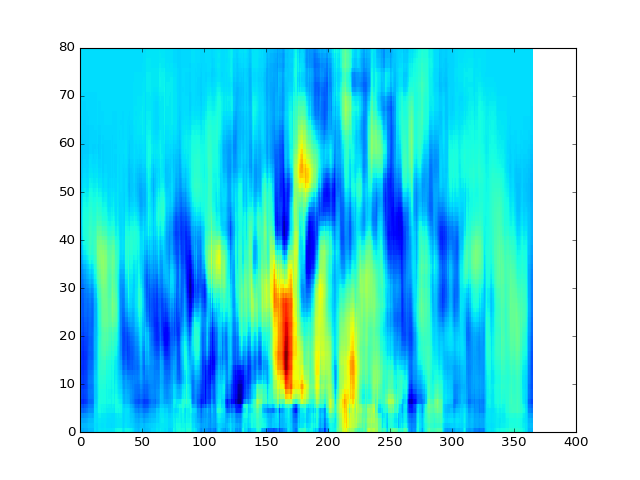

time: 661 ms


In [57]:
plt.pcolor(P_band_diff_smth[1].T)

In [ ]:
## NEW STRATEGY - performing the bootstrapping simply as a function of the data and years
yr0=1951
daysmth = 15 #smoothing in days used to show data on rainfall differences
niter=1000 #how many iterations each time?

In [ ]:
#third axis - choice of time periods, fourth axis - block length
P_total_diff_pval = np.empty((365,80,2,4)) 
P_band_diff_pval = np.empty((365,80,2,4)) 
P_local_diff_pval = np.empty((365,80,2,4)) 